## yt Help Slack Channel Text Analysis

In [89]:
import pandas as pd
import json
import glob
import matplotlib.pyplot as plt
import numpy as np
import re
from datetime import datetime
from itertools import chain
import emoji_data_python

In [90]:
#borrowed

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s|]' if not remove_digits else r'[^a-zA-z\s|]'
    text = re.sub(pattern, '', text)
    text = text.replace('`', "")
    return text

In [91]:
def find_special_characters(text):
    pattern = r'[:a-zA-z:/]' 
    match = re.findall(pattern, text)
    return match

In [92]:
print(find_special_characters('sam is happy 123 :confused:'))

['s', 'a', 'm', 'i', 's', 'h', 'a', 'p', 'p', 'y', ':', 'c', 'o', 'n', 'f', 'u', 's', 'e', 'd', ':']


In [93]:
def remove_stop_words(word_list):
    clean_list = []
    list_split = word_list.split()
    for w in list_split:
        if w not in stopwords:
            clean_list.append(w)
    return(clean_list)


In [94]:
def accummulate(two_lists):
    end_dict = {}
    for x in two_lists:
        if x not in end_dict:
            end_dict[x] = 1
        else:
            end_dict[x] = end_dict[x] + 1
    return(end_dict)

In [95]:
def get_code(words, start_symbol, end_symbol, pattern, anti_pattern='?'):
    code_block = ''
    if anti_pattern not in words:
        if pattern in words:
            code_block_start = words.find(start_symbol, 0, len(words))
            code_block_end = words.find(end_symbol, code_block_start+1, len(words))
            code_block = words[code_block_start+1:code_block_end]
           # print(code_block)
    return code_block

In [96]:
otherfile = open("stopwords.txt", "rt")

stopwords = otherfile.read()

In [119]:
user_id = []
user_text =[]
just_words = []
user_id_dict = {}
ts_id_dict = {}

for file in glob.iglob('yt-Slack-export-Mar-17-2015-Apr-1-2020/help/*.json'):
    one_file = open(file, 'r')
    json_file = json.load(one_file)
    
    for j in json_file:
            
        for i in j.keys():
            try:
                if i == 'ts':
                    text = j['text'].lower()
                    if j['ts'] not in ts_id_dict:
                        ts_id_dict[j['ts']] = [j['type'], j['user'], text]
                    if j['files'] != None:
                        files = j['files']
                        for f in files:
                            file_shared = f['filetype']
                            #print(file_shared)
                    ts_id_dict[j['ts']].append(file_shared)
            except:
                pass

            if i == 'text':
                one_word = j['text'].split(' ')
                just_words += one_word
                user_text.append(j['text'])
                

In [122]:
df_ts_id = pd.DataFrame.from_dict(ts_id_dict, orient='index', columns = ["type", "user", "text", "files"])

In [123]:
df_ts_id

,type,user,text,files
1574339930.160000,message,UD9L1D44T,hi ! i’m pretty sure it’s possible to define u...,None
1574344978.161000,message,U042FH0RB,i don’t actually think there is a public api t...,None
1574383719.162300,message,U046K2QNK,in `powderday` i'm trying to write code that w...,None
1574398975.162800,message,U042FH0RB,that’ll break when yt-4.0 comes out,None
1574398987.163300,message,U042FH0RB,maybe just check the first digit of the versio...,None
...,...,...,...,...
1582851657.082100,message,U042FH0RB,i can probably provide a workaround if i have ...,None
1582851666.082400,message,U042FH0RB,<@ujeeuv7lh> ^,None
1582863926.083400,message,UJEEUV7LH,<@u042fh0rb> yeah let me see if i can reproduc...,None
1529422577.000017,message,UBA7LU7UJ,<@uba7lu7uj> has joined the channel,None


In [124]:
df_ts_id['timestamp'] = [str(datetime.fromtimestamp(float(x)))for x in df_ts_id.index]

In [125]:
df_ts_id[['date', 'time']] = df_ts_id['timestamp'].str.split(expand = True)

In [126]:
df_ts_id['word_count'] = [len(x) for x in df_ts_id['text']]

In [127]:
df_ts_id['clean_text'] = [remove_special_characters(x) for x in df_ts_id['text']]

In [128]:
df_ts_id['cleaner_text'] = [remove_stop_words(x) for x in df_ts_id['clean_text']]

In [129]:
df_ts_id['year'] = [x[:4] for x in df_ts_id['date']]

In [130]:
df_ts_id['year-month'] = [x[:7] for x in df_ts_id['date']]

In [131]:
df_ts_id['code_block'] = [get_code(x, '```', '```', '```') for x in df_ts_id['text']]

In [132]:
df_ts_id['code_block'] = df_ts_id['code_block'].replace('', np.nan, regex=True)

In [133]:
df_ts_id['links'] = [get_code(x, '<', '>', 'http', '@') for x in df_ts_id['text']]

In [134]:
df_ts_id['links'] = df_ts_id['links'].replace('', np.nan, regex=True)

In [135]:
df_ts_id['emojis'] = [get_code(x, ':', ':', ':', 'http') for x in df_ts_id['text']]

In [136]:
df_ts_id['emojis'] = df_ts_id['emojis'].replace('', np.nan, regex=True)

In [137]:
df_ts_id

,type,user,text,files,timestamp,date,time,word_count,clean_text,cleaner_text,year,year-month,code_block,links,emojis
1574339930.160000,message,UD9L1D44T,hi ! i’m pretty sure it’s possible to define u...,None,2019-11-21 06:38:50.160000,2019-11-21,06:38:50.160000,151,hi im pretty sure its possible to define unit...,"[pretty, possible, define, units, equivalences...",2019,2019-11,NaN,NaN,NaN
1574344978.161000,message,U042FH0RB,i don’t actually think there is a public api t...,None,2019-11-21 08:02:58.161000,2019-11-21,08:02:58.161000,115,i dont actually think there is a public api to...,"[actually, think, public, api, poke, around, c...",2019,2019-11,NaN,NaN,NaN
1574383719.162300,message,U046K2QNK,in `powderday` i'm trying to write code that w...,None,2019-11-21 18:48:39.162300,2019-11-21,18:48:39.162300,294,in powderday im trying to write code that will...,"[powderday, trying, write, code, automagically...",2019,2019-11,NaN,NaN,\n blah``
1574398975.162800,message,U042FH0RB,that’ll break when yt-4.0 comes out,None,2019-11-21 23:02:55.162800,2019-11-21,23:02:55.162800,35,thatll break when yt40 comes out,"[thatll, break, yt40, comes]",2019,2019-11,NaN,NaN,NaN
1574398987.163300,message,U042FH0RB,maybe just check the first digit of the versio...,None,2019-11-21 23:03:07.163300,2019-11-21,23:03:07.163300,55,maybe just check the first digit of the versio...,"[maybe, check, first, digit, version, string]",2019,2019-11,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582851657.082100,message,U042FH0RB,i can probably provide a workaround if i have ...,None,2020-02-27 19:00:57.082100,2020-02-27,19:00:57.082100,66,i can probably provide a workaround if i have ...,"[probably, provide, workaround, code, look]",2020,2020-02,NaN,NaN,NaN
1582851666.082400,message,U042FH0RB,<@ujeeuv7lh> ^,None,2020-02-27 19:01:06.082400,2020-02-27,19:01:06.082400,14,ujeeuv7lh ^,"[ujeeuv7lh, ^]",2020,2020-02,NaN,NaN,NaN
1582863926.083400,message,UJEEUV7LH,<@u042fh0rb> yeah let me see if i can reproduc...,None,2020-02-27 22:25:26.083400,2020-02-27,22:25:26.083400,126,u042fh0rb yeah let me see if i can reproduce i...,"[u042fh0rb, let, see, reproduce, one, test, da...",2020,2020-02,NaN,NaN,NaN
1529422577.000017,message,UBA7LU7UJ,<@uba7lu7uj> has joined the channel,None,2018-06-19 10:36:17.000017,2018-06-19,10:36:17.000017,35,uba7lu7uj has joined the channel,"[uba7lu7uj, joined, channel]",2018,2018-06,NaN,NaN,NaN


In [138]:
emojis_in_df = df_ts_id[df_ts_id['emojis'].notnull()]
emojis_in_df['emojis']

1574383719.162300                                          \n   blah``
1535486614.000100                                               (units
1535486793.000100                                slightly_smiling_face
1568659517.000300      how do i get the star formation rate _now_? ...
1539078336.000100     what should the argument of `yt.sliceplot.set...
                                           ...                        
1543356351.214600                                slightly_smiling_face
1543356712.215600                                                smile
1470343074.000003                                  getting help with y
1579616136.034900    \n```import yt\nimport numpy as np\n\nds = yt....
1582845692.078400     &lt;ufunc '? (vectorized)'&gt;` and `unit_ope...
Name: emojis, Length: 527, dtype: object

In [139]:
links_in_df = df_ts_id[df_ts_id['links'].notnull()]
links_in_df['links']

1574399098.164000    https://github.com/yt-project/yt/blob/master/s...
1535486275.000200    https://gist.github.com/cphyc/ea1f8217cfd7b04f...
1535487825.000100    https://github.com/yt-project/yt/blob/70403c8b...
1529516560.000400    https://github.com/yt-project/yt/blob/master/y...
1529517861.000514                        https://pastebin.com/tmffef1g
                                           ...                        
1564583364.075800    https://yt-project.org/doc/visualizing/manual_...
1553538469.138100    http://yt-project.org/doc/analyzing/analysis_m...
1553538859.140400      http://hea-www.cfa.harvard.edu/~jzuhone/pyxsim/
1574108890.157600           https://github.com/yt-project/yt/pull/2358
1582850287.080200       http://yt-project.org/data|yt-project.org/data
Name: links, Length: 321, dtype: object

In [140]:
code_in_df = df_ts_id[df_ts_id['code_block'].notnull()]
code_in_df['code_block']

1535486614.000100    ``\n&gt; sp['gas_tracer', 'cell_density']\n\nd...
1529519395.000412    ``\ndiff --git a/yt/fields/field_detector.py b...
1553624983.150900    ``\nad.set_field_parameter('rotation_vectors',...
1534107369.000030    ``file "../../../pelecode/pele_make_movie_stri...
1563994530.015300    ``\nds = yt.load('out.e')\nprint(ds.field_list)\n
                                           ...                        
1529080978.000581    ``\nextensions = ['sphinx.ext.autodoc', 'sphin...
1537971427.000100    ``\nin [1]: ds.coordinates.x_axis['z'] = 1\n\n...
1536257154.000100    ``\nplot = yt.sliceplot(ds, 'z', ['density', '...
1579616136.034900    ``import yt\nimport numpy as np\n\nds = yt.loa...
1571869601.050100    ``\nds.coordinates.x_axis[1] = 0\nds.coordinat...
Name: code_block, Length: 178, dtype: object

In [141]:
files_in_df = df_ts_id[df_ts_id['files'].notnull()]
files_in_df['files']

1535486275.000100    python
1535487390.000100    binary
1553637365.185500       png
1553637396.185900       png
1534107187.000045    python
                      ...  
1541653143.129500      text
1583886793.164600       png
1547517036.155900      text
1576170147.300800    binary
1583507899.152200       png
Name: files, Length: 121, dtype: object

In [142]:
df_ts_id.describe()

,word_count
count,5898.000000
mean,107.604781
std,210.659686
min,0.000000
25%,35.000000
50%,63.000000
75%,113.000000
max,5412.000000


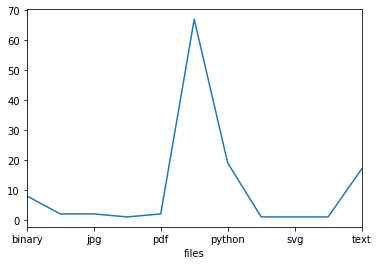

In [143]:
df_ts_id.groupby('files')['text'].count().plot()

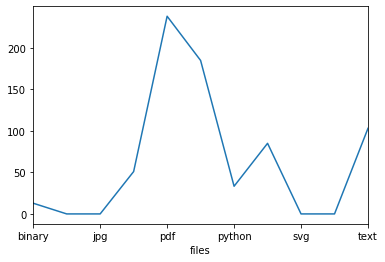

In [144]:
df_ts_id.groupby('files')['word_count'].mean().plot()

Text(0, 0.5, 'Count of Messages')

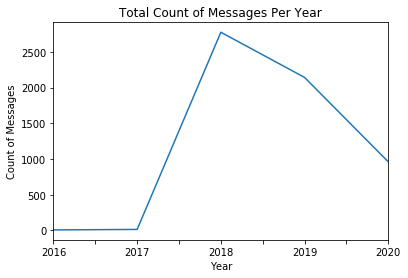

In [145]:
messages_per_date_ts = df_ts_id.groupby('year')['text'].count().plot()
plt.title("Total Count of Messages Per Year")
plt.xlabel("Year")
plt.ylabel("Count of Messages")

Text(0, 0.5, 'Count of Messages')

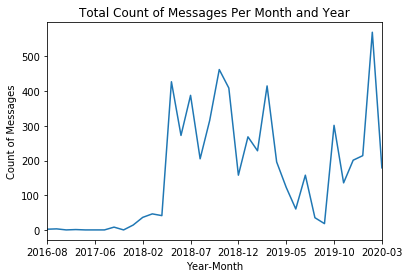

In [146]:
messages_per_date_ts = df_ts_id.groupby('year-month')['text'].count().plot()
plt.title("Total Count of Messages Per Month and Year")
plt.xlabel("Year-Month")
plt.ylabel("Count of Messages")

Text(0, 0.5, 'Average Number of Words per Message')

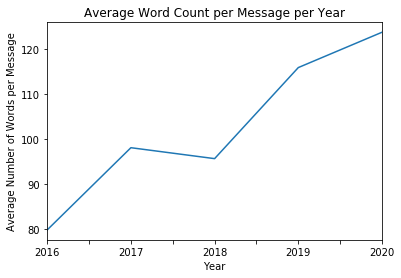

In [147]:
messages_per_date_ts = df_ts_id.groupby('year')['word_count'].mean().plot()
plt.title("Average Word Count per Message per Year")
plt.xlabel("Year")
plt.ylabel("Average Number of Words per Message")

Text(0, 0.5, 'Average Word Count')

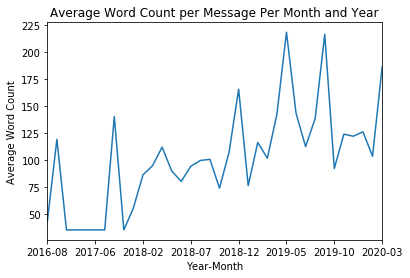

In [148]:
messages_per_date_ts = df_ts_id.groupby('year-month')['word_count'].mean().plot()
plt.title("Average Word Count per Message Per Month and Year")
plt.xlabel("Year-Month")
plt.ylabel("Average Word Count")

Text(0.5, 1.0, 'Distribution of Word Count per Message')

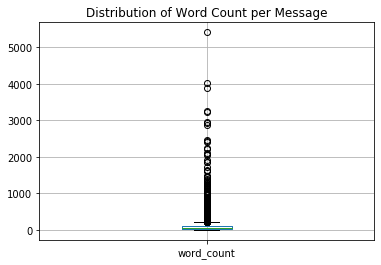

In [149]:
df_ts_id.boxplot(column='word_count')
plt.title("Distribution of Word Count per Message")

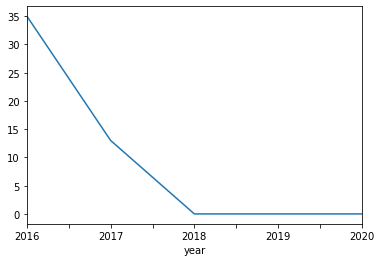

In [150]:
df_ts_id.groupby('year')['word_count'].min().plot()

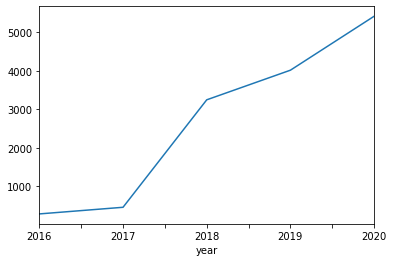

In [151]:
df_ts_id.groupby('year')['word_count'].max().plot()

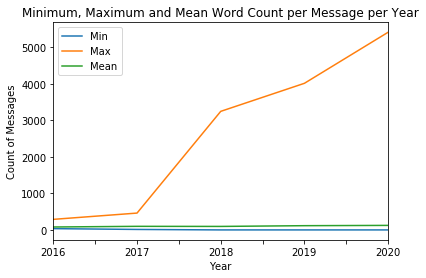

In [152]:
df_ts_id.groupby('year')['word_count'].min().plot()
df_ts_id.groupby('year')['word_count'].max().plot()
df_ts_id.groupby('year')['word_count'].mean().plot()
plt.title("Minimum, Maximum and Mean Word Count per Message per Year")
plt.xlabel("Year")
plt.ylabel("Count of Messages")
plt.legend(['Min', 'Max', 'Mean'])

In [170]:
df_ts_id.groupby(['code_block', 'links', 'files'])['word_count'].plot()

Series([], Name: word_count, dtype: float64)

Text(0, 0.5, 'Count of Messages')

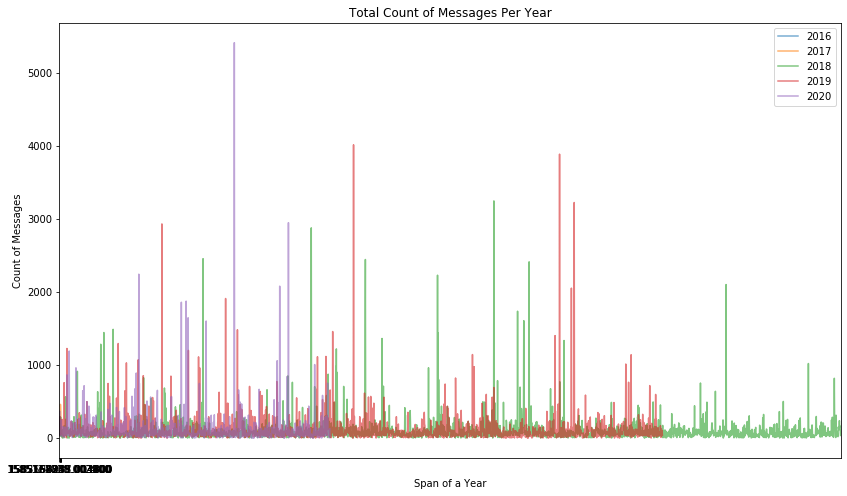

In [153]:
plt.figure(figsize=(14, 8))
df_ts_id.groupby('year')['word_count'].plot(alpha=0.6)
plt.legend()
plt.title("Total Count of Messages Per Year")
plt.xlabel("Span of a Year")
plt.ylabel("Count of Messages")


In [166]:
print(len(df_ts_id[df_ts_id['code_block'].notnull()]), "code blocks, which is % of code blocks", (len(df_ts_id[df_ts_id['code_block'].notnull()])/len(df_ts_id)*100))
print()
print(len(df_ts_id[df_ts_id['links'].notnull()]), "links, which is % of links", (len(df_ts_id[df_ts_id['links'].notnull()])/len(df_ts_id)*100))
print()
print(len(df_ts_id[df_ts_id['files'].notnull()]), '% of files', (len(df_ts_id[df_ts_id['files'].notnull()])/len(df_ts_id)*100))

178 code blocks, which is % of code blocks 3.017972193964056

321 links, which is % of links 5.442522889114954

121 % of files 2.0515428958969144


In [171]:
just_words_sort = {}

for x in df_ts_id['cleaner_text']:
    #print(x)
    for y in x:
       # print(y)
        if y not in just_words_sort:
            just_words_sort[y] = 1
        else:
            just_words_sort[y] = just_words_sort[y] + 1
    

In [172]:
sorted_word_list = list(just_words_sort.items())

In [173]:
def by_value(pair):
    return pair[1]

sorted_word_list.sort(key = by_value, reverse= True)

count = 0

d_sorted = {}

for pair in sorted_word_list:
    count += 1
    if count <= 25:
        d_sorted[pair[0]] = pair[1]
    
print(d_sorted.items())

dict_items([('yt', 746), ('data', 476), ('field', 395), ('think', 360), ('thanks', 298), ('one', 266), ('using', 265), ('file', 247), ('channel', 235), ('make', 233), ('see', 228), ('issue', 224), ('joined', 212), ('know', 209), ('work', 209), ('something', 196), ('code', 195), ('dataset', 192), ('fields', 189), ('try', 185), ('plot', 175), ('particle', 166), ('slightly_smiling_face', 154), ('doing', 151), ('trying', 149)])


Text(0.5, 1.0, 'Top words in yt Help Slack Channel')

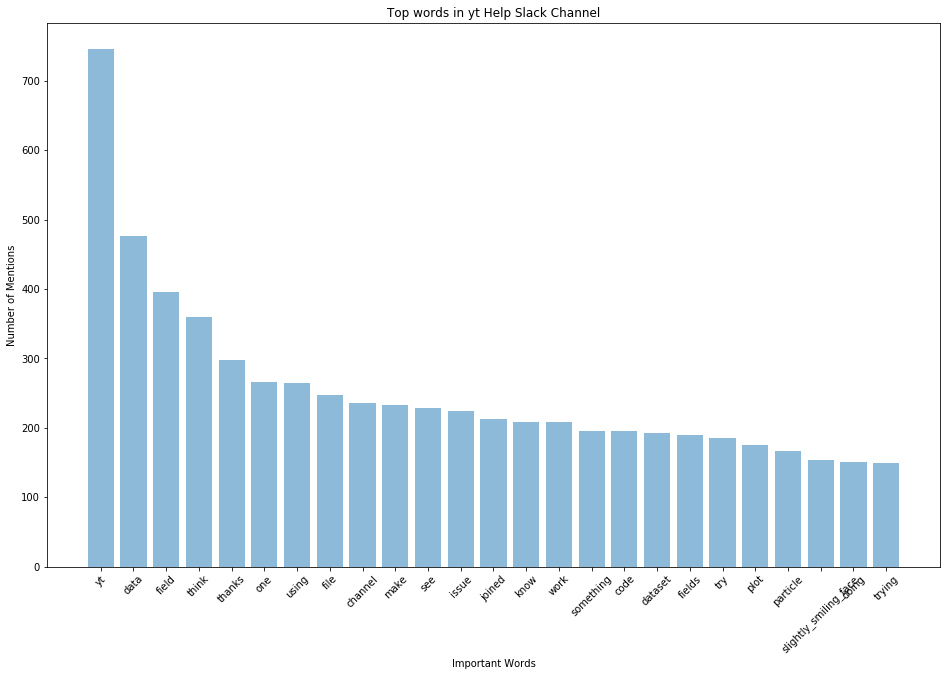

In [174]:
plt.figure(figsize=(16, 10))
plt.bar(d_sorted.keys(), d_sorted.values(), align='center', alpha=0.5)
plt.xticks(rotation=45)
plt.xlabel('Important Words')
plt.ylabel('Number of Mentions')
plt.title("Top words in yt Help Slack Channel")


In [175]:
date_and_words = df_ts_id[['date', 'cleaner_text']]

In [176]:
date_and_words.set_index('date')

,cleaner_text
date,
2019-11-21,"[pretty, possible, define, units, equivalences..."
2019-11-21,"[actually, think, public, api, poke, around, c..."
2019-11-21,"[powderday, trying, write, code, automagically..."
2019-11-21,"[thatll, break, yt40, comes]"
2019-11-21,"[maybe, check, first, digit, version, string]"
...,...
2020-02-27,"[probably, provide, workaround, code, look]"
2020-02-27,"[ujeeuv7lh, ^]"
2020-02-27,"[u042fh0rb, let, see, reproduce, one, test, da..."


In [177]:
def cleaning(two_lists, new_dict):
    for x in two_lists:
        if x not in new_dict:
            new_dict[x] = 1
        else:
            new_dict[x] = new_dict[x]+1
                
    return new_dict
      

In [178]:

def cat_count_words(user_cat):
    cat_list = []
    if user_cat in categories.keys():
        cat_filter = categories[user_cat]
        for i,v in just_words_sort.items():
            if i in cat_filter:
                cat_list.append([i,v])
    return cat_list

In [179]:
categories = {'versioning' : ['git', 'conda', 'version', 'issue', 'condaforge', 
              'pip', 'fork', 'repository', 'master', 'branch',
              'homebrew', 'path', 'github', 'repo', 'request', 
             'pull', 'push'],
              
              'frontends' : ['ahf', 'amrvac', 'art', 'artio', 'athena', 'athena_pop', 
             'boxlib', 'chombo', 'eagle', 'enzo', 'enzo_p', 'exodus_ii', 
             'fits', 'flash', 'gadget', 'gadget_fof', 'gamer', 'gdf', 
             'gizmo', 'halo_catalog', 'http_stream', 'moab', 'open_pmd', 
             'owls', 'owls_subfind', 'ramses',
             'rockstar', 'sdf', 'sph', 'stream', 'tipsy', 'ytdata', 'frontend',
            'frontends'],
              
            'visualization' : ['sliceplot', 'slice', 'plot', 
            'projection', 'projectionplot', 'phase', 'profile', 
                'phaseplot','2d', '3d', 'color', 'colormap', 
            'plotting', 'image', 'images', 'resolution',
            'line', 'lineplot', 'axis', 'streamlines', 'png'],
             'loading_data' : ['load', 'data', 'file', 'zip', 'hdf5', 'json', 
                'notebook', 'dataset', 'files', 'txt', 'folder', 
                'directory', 'loading', 'loads', 'unzip', 'tar'
               ],
              
             'installation' : ['install', 'release', 'installing', 'installed',
               'update', 'enivronment', 'dependency', 'dependencies',
               'requirements', 'machine', 'windows', 'mac'],
              
             'volume_rendering' : ['volume', 'render', 'volumerender', 'volumerendering', 'rendering', 'rotate', 'camera', 'lens', 
                   'blend', 'blender', 'scene', 'zbuffer', 'off', 'axis'
                   'offaxis', 'shader', 'transfer function'],
              
              'volume_rendering': ['volume', 'render', 'volumerender', 'volumerendering', 'rendering', 'rotate', 'camera', 'lens', 
                   'blend', 'blender', 'scene', 'zbuffer', 'off', 'axis'
                   'offaxis', 'shader', 'transfer function'],
             
              'analysis' : ['analysis', 'average', 'mean', 'sum', 'median', 'max', 'maximum', 'min', 'clump','minimum', 
            'absorption spectrum', 'cosmological observation', 'halo', 'halos', 'halofinder',
           'halo mass function', 'level sets', 'particle trajectories', 'photon simulator', 'ppv cube',
           'radmc 3d export', 'spectral integrator', 'star analysis', 'sunrise export', 'sunyaev_zeldovich', 'two point functions'],
              
            'units' : ['unit', 'units', 'unyt', 'cm', 'mm', 'cgs', 'km', 
         'dimensions', 'equivalencies', 'symbols','symbol',
         'conversions'],
              
          'data_structures' : ['array', 'container', 'object', 
                   'time series', 'unions', 'mesh', 'grid', 
                   'unstructured', 'grid patch', 'uniform', 'structured',
                  'region', 'cell', 'cells', 'sphere', 'cylinder', 
                   'disk', 'objects', 'containers', 'octree', 'ytarray', 
                   'ytcontainer', 'string', 'list', 'dictionary', 'tuple'],
              
           'community' : ['channel', 'worksop', 'tutorial', 'meeting', 'resources',
            'website', 'twitter', 'opensource', 'docs', 'documentation',
             'presenation', 'paper', 'poster', 'joined', 'conduct'],
            
            'coordinates' : ['spherical', 'cartesian', 'azimuthal', 'coordinates'],
              
            
            'other_libraries' : ['numpy', 'matplotlib', 'cartopy']
    
              
              
             }

In [180]:
category_count = {}

In [181]:
version_total = 0
for i,v in just_words_sort.items():
    if i in categories['versioning']:
        print(i, v)
        version_total += v
print(version_total)

category_count['versioning'] = version_total 

version 123
issue 224
pull 42
request 21
repo 17
git 44
github 42
condaforge 89
conda 46
path 25
pip 69
branch 34
push 4
repository 4
fork 9
master 27
homebrew 1
821


In [182]:
frontends_total = 0
for i, v in just_words_sort.items():
    if i in categories['frontends']:
        print(i, v)
        frontends_total +=v
print(frontends_total)
category_count['frontends'] = frontends_total 

frontend 37
rockstar 31
ramses 45
athena 7
fits 5
sph 54
gizmo 26
boxlib 2
enzo 26
gadget 21
artio 1
tipsy 3
amrvac 6
art 1
ahf 17
frontends 5
ytdata 4
stream 10
eagle 3
flash 4
halo_catalog 1
309


In [183]:
viz_total = 0
for i, v in just_words_sort.items():
    if i in categories['visualization']:
        print(i, v)
        viz_total += v
print(viz_total)
category_count['viz'] = viz_total 

2d 38
line 147
3d 57
image 92
png 7
colormap 14
phase 18
plot 175
profile 70
axis 41
plotting 30
slice 50
color 26
phaseplot 13
resolution 48
projection 72
projectionplot 21
sliceplot 23
streamlines 16
images 15
lineplot 1
974


In [184]:
loading_data_total = 0
for i,v in just_words_sort.items():
    if i in categories['loading_data']:
        print(i, v)
        loading_data_total += v
print(loading_data_total)
category_count['loading_data'] = loading_data_total 

data 476
dataset 192
directory 19
files 58
file 247
loading 27
load 76
notebook 28
folder 9
hdf5 10
tar 3
loads 2
1147


In [185]:
installation_total = 0
for i,v in just_words_sort.items():
    if i in categories['installation']:
        print(i, v)
        installation_total += v
print(installation_total)

category_count['installation'] = installation_total

installing 55
install 122
dependency 2
mac 11
installed 39
machine 15
release 15
dependencies 4
update 34
windows 3
requirements 3
303


In [186]:
volume_total = 0
for i,v in just_words_sort.items():
    if i in categories['volume_rendering']:
        print(i, v)
        volume_total += v
print(volume_total)

category_count['volume_rendering'] = volume_total 

volume 54
rendering 43
rotate 9
off 34
render 7
volumerender 1
scene 3
camera 1
lens 4
blender 1
157


In [187]:
analysis_total = 0
for i,v in just_words_sort.items():
    if i in categories['analysis']:
        print(i, v)
        analysis_total += v
print(analysis_total)

category_count['analysis'] = analysis_total 

halo 102
mean 60
halos 40
analysis 22
minimum 3
maximum 4
average 18
min 12
max 19
clump 7
sum 11
298


In [188]:
units_total = 0
for i,v in just_words_sort.items():
    if i in categories['units']:
        print(i, v)
        units_total += v
print(units_total)

category_count['units'] = units_total 

units 92
unit 43
cm 13
cgs 4
dimensions 5
unyt 11
symbol 3
conversions 1
symbols 2
174


In [189]:
data_structures_total = 0
for i,v in just_words_sort.items():
    if i in categories['data_structures']:
        print(i, v)
        data_structures_total += v
print(data_structures_total)

category_count['data_structures'] = data_structures_total

string 11
cell 38
grid 98
cells 27
array 55
sphere 52
object 126
objects 32
unstructured 9
mesh 42
tuple 8
dictionary 12
ytarray 9
list 48
region 52
disk 27
structured 4
octree 38
uniform 14
containers 2
container 6
unions 2
cylinder 1
713


In [190]:
community_total = 0
for i,v in just_words_sort.items():
    if i in categories['community']:
        print(i, v)
        community_total += v
print(community_total)

category_count['community'] = community_total

joined 212
channel 235
documentation 25
paper 18
docs 37
tutorial 10
website 8
poster 1
meeting 3
resources 4
553


In [191]:
coordinates_total = 0
for i,v in just_words_sort.items():
    if i in categories['coordinates']:
        print(i, v)
        coordinates_total += v
print(coordinates_total)

category_count['coordinates'] = coordinates_total

cartesian 16
coordinates 32
spherical 11
azimuthal 2
61


In [192]:
other_libraries_total = 0
for i,v in just_words_sort.items():
    if i in categories['other_libraries']:
        print(i, v)
        other_libraries_total += v
print(other_libraries_total)

category_count['other_libraries'] = other_libraries_total

numpy 34
matplotlib 56
cartopy 5
95


In [193]:
sorted_category_list = list(category_count.items())

sorted_category_list.sort(key = by_value, reverse= True)

category_sorted = {}

for pair in sorted_category_list:
    category_sorted[pair[0]] = pair[1]
    
print(category_sorted.items())

dict_items([('loading_data', 1147), ('viz', 974), ('versioning', 821), ('data_structures', 713), ('community', 553), ('frontends', 309), ('installation', 303), ('analysis', 298), ('units', 174), ('volume_rendering', 157), ('other_libraries', 95), ('coordinates', 61)])


Text(0.5, 0, 'Categories')

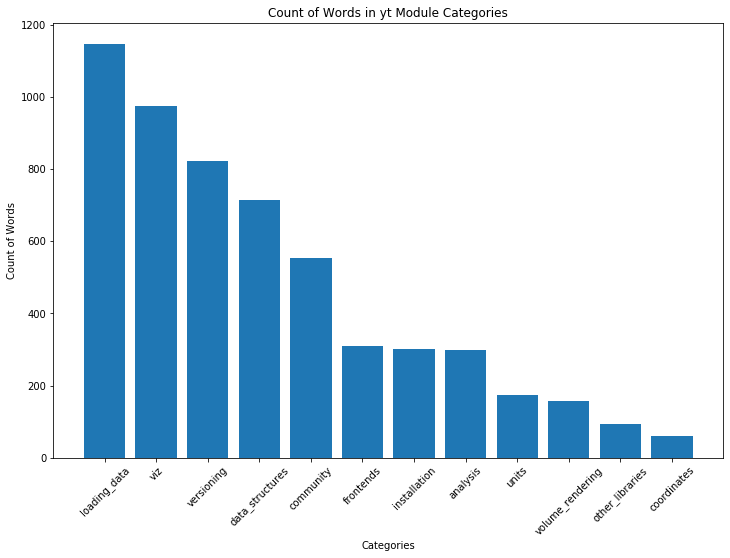

In [194]:
plt.figure(figsize=(12, 8))
plt.bar(category_sorted.keys(), category_sorted.values())
plt.xticks(rotation=45)
plt.title('Count of Words in yt Module Categories')
plt.ylabel('Count of Words')
plt.xlabel('Categories')

In [195]:
print(category_count.items())

dict_items([('versioning', 821), ('frontends', 309), ('viz', 974), ('loading_data', 1147), ('installation', 303), ('volume_rendering', 157), ('analysis', 298), ('units', 174), ('data_structures', 713), ('community', 553), ('coordinates', 61), ('other_libraries', 95)])


Enter a category:  units


['units', 92]
['unit', 43]
['cm', 13]
['unyt', 11]
['dimensions', 5]
['cgs', 4]
['symbol', 3]
['symbols', 2]
['conversions', 1]


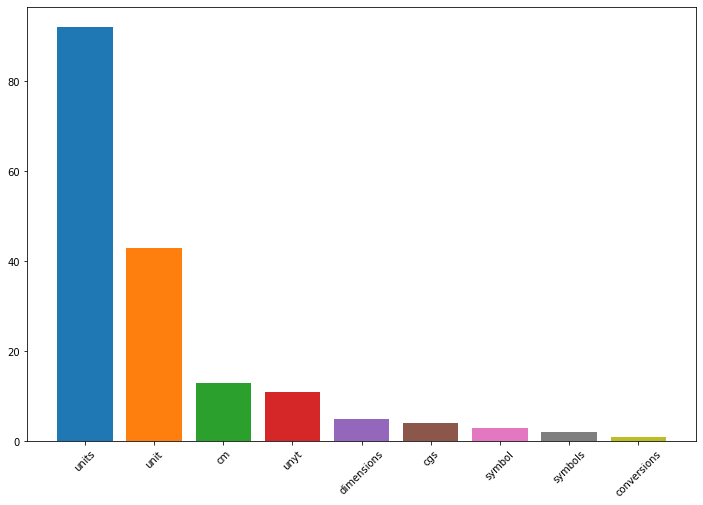

In [198]:
user_category = input("Enter a category: ")

t = cat_count_words(user_category)

plt.figure(figsize=(12, 8))

t_sorted = t.sort(key=lambda x: x[1], reverse = True)

for x in t:
    print(x)
    plt.bar(x[0], x[1])
    plt.xticks(rotation=45)

In [199]:
df_ts_id['words_per_ts'] = df_ts_id['cleaner_text'].map(lambda i: accummulate(i))
df_ts_id

,type,user,text,files,timestamp,date,time,word_count,clean_text,cleaner_text,year,year-month,code_block,links,emojis,words_per_ts
1574339930.160000,message,UD9L1D44T,hi ! i’m pretty sure it’s possible to define u...,None,2019-11-21 06:38:50.160000,2019-11-21,06:38:50.160000,151,hi im pretty sure its possible to define unit...,"[pretty, possible, define, units, equivalences...",2019,2019-11,NaN,NaN,NaN,"{'pretty': 1, 'possible': 1, 'define': 1, 'uni..."
1574344978.161000,message,U042FH0RB,i don’t actually think there is a public api t...,None,2019-11-21 08:02:58.161000,2019-11-21,08:02:58.161000,115,i dont actually think there is a public api to...,"[actually, think, public, api, poke, around, c...",2019,2019-11,NaN,NaN,NaN,"{'actually': 1, 'think': 1, 'public': 1, 'api'..."
1574383719.162300,message,U046K2QNK,in `powderday` i'm trying to write code that w...,None,2019-11-21 18:48:39.162300,2019-11-21,18:48:39.162300,294,in powderday im trying to write code that will...,"[powderday, trying, write, code, automagically...",2019,2019-11,NaN,NaN,\n blah``,"{'powderday': 1, 'trying': 1, 'write': 1, 'cod..."
1574398975.162800,message,U042FH0RB,that’ll break when yt-4.0 comes out,None,2019-11-21 23:02:55.162800,2019-11-21,23:02:55.162800,35,thatll break when yt40 comes out,"[thatll, break, yt40, comes]",2019,2019-11,NaN,NaN,NaN,"{'thatll': 1, 'break': 1, 'yt40': 1, 'comes': 1}"
1574398987.163300,message,U042FH0RB,maybe just check the first digit of the versio...,None,2019-11-21 23:03:07.163300,2019-11-21,23:03:07.163300,55,maybe just check the first digit of the versio...,"[maybe, check, first, digit, version, string]",2019,2019-11,NaN,NaN,NaN,"{'maybe': 1, 'check': 1, 'first': 1, 'digit': ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582851657.082100,message,U042FH0RB,i can probably provide a workaround if i have ...,None,2020-02-27 19:00:57.082100,2020-02-27,19:00:57.082100,66,i can probably provide a workaround if i have ...,"[probably, provide, workaround, code, look]",2020,2020-02,NaN,NaN,NaN,"{'probably': 1, 'provide': 1, 'workaround': 1,..."
1582851666.082400,message,U042FH0RB,<@ujeeuv7lh> ^,None,2020-02-27 19:01:06.082400,2020-02-27,19:01:06.082400,14,ujeeuv7lh ^,"[ujeeuv7lh, ^]",2020,2020-02,NaN,NaN,NaN,"{'ujeeuv7lh': 1, '^': 1}"
1582863926.083400,message,UJEEUV7LH,<@u042fh0rb> yeah let me see if i can reproduc...,None,2020-02-27 22:25:26.083400,2020-02-27,22:25:26.083400,126,u042fh0rb yeah let me see if i can reproduce i...,"[u042fh0rb, let, see, reproduce, one, test, da...",2020,2020-02,NaN,NaN,NaN,"{'u042fh0rb': 1, 'let': 1, 'see': 1, 'reproduc..."
1529422577.000017,message,UBA7LU7UJ,<@uba7lu7uj> has joined the channel,None,2018-06-19 10:36:17.000017,2018-06-19,10:36:17.000017,35,uba7lu7uj has joined the channel,"[uba7lu7uj, joined, channel]",2018,2018-06,NaN,NaN,NaN,"{'uba7lu7uj': 1, 'joined': 1, 'channel': 1}"


In [70]:
list(df_ts_id['words_per_ts'])

[{},
 {},
 {'equation': 1, 'normal': 1, 'gather': 1, 'assumes': 1, 'omegax': 1, '1': 1},
 {'visual': 1, 'comparison': 1},
 {'stripped': 1, 'version': 1, 'code': 1},
 {},
 {'think': 1,
  'geometry': 1,
  'shown': 1,
  'paraview': 1,
  'first': 1,
  'attached': 1,
  'picture': 1,
  'got': 1,
  'background': 1,
  'setting': 1,
  'second': 1,
  'one': 1},
 {'see': 1,
  'every': 1,
  'field': 1,
  'length': 1,
  'time': 1,
  'mass': 1,
  'ect': 1,
  'unit': 1,
  'goes': 1,
  'information': 1,
  'seems': 1,
  'stored': 1,
  'ds': 1,
  'object': 1},
 {},
 {},
 {'grad': 1,
  'student': 1,
  'starting': 1,
  'yt': 4,
  'simple': 1,
  'question': 1,
  'place': 1,
  'ask': 1,
  'going': 1,
  'different': 1,
  'fields': 1,
  'artio': 1,
  'data': 1,
  'seeing': 1,
  'units': 5,
  'associated': 2,
  'them': 1,
  'noticing': 1,
  'pressure': 2,
  'maybe': 1,
  'unit': 1,
  'conversion': 1,
  'thing': 1,
  'happening': 1,
  'missing': 2,
  'something': 2,
  'more': 1,
  'fundamental': 1,
  'additiona